In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [2]:


import os

# Define the path to the dataset directory
dataset_path = "/content/drive/MyDrive/gall_data/gall"

# Get the list of image files
image_files = []
labels = []

# Iterate over the directories
for class_name in ['2', '1', '0']:
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        image_files.append(image_path)
        labels.append(class_name)

# Convert labels to numerical values
from tensorflow.keras.utils import to_categorical

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoded format
labels = to_categorical(labels)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
print(labels.shape)
print(len(image_files))
print(labels)

(1255, 3)
1255
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [4]:


X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.2, random_state=42, stratify=labels)



In [5]:
print(y_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0.

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
original_classes = ['2', '1', '0']
label_encoder.fit(original_classes)
c_test=y_test
class_names = label_encoder.inverse_transform(np.argmax(c_test, axis=1))
#print(c_test)
class_names = class_names.astype(int)
print(class_names)

[0 0 1 2 1 2 1 1 0 2 2 0 1 0 0 2 1 1 1 1 0 1 0 0 1 1 2 1 1 1 2 0 2 0 1 2 2
 0 0 2 0 1 1 2 0 1 1 1 0 2 1 0 1 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 2 0 0 0 1 0 2 2 1 1 2 0 1 0 2 1 1 2 0 1 0 0 0 0 0 1 1 0 1 2 0 2 1 2
 2 0 1 0 1 2 1 1 2 1 1 1 0 1 0 1 0 0 1 1 1 2 0 1 0 2 1 0 1 1 2 2 0 0 1 0 1
 2 1 0 0 0 0 0 1 2 1 0 2 0 0 2 0 0 2 2 1 0 0 2 0 1 1 0 1 1 1 0 1 2 1 0 2 0
 1 0 0 2 0 2 0 0 0 1 2 1 0 1 2 2 1 2 1 0 1 1 0 1 2 1 0 1 1 0 0 1 0 1 1 1 1
 0 0 1 0 0 0 1 1 1 1 0 0 1 1 2 0 2 1 2 1 1 2 0 1 1 0 1 1 1]


In [10]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

1004 1004
251 251


In [11]:
# Define a function to load and preprocess the images
def load_preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((150, 150))
    image = image.convert('L')
    image = np.array(image)
    image = image.reshape((150, 150, 1))
    image = image.astype('float32') / 255.0
    return image


# def load_preprocess_image(image_path):
#     image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
#     image = tf.keras.preprocessing.image.img_to_array(image)
#     image = image / 255.0
#     return image

X_train = [str(image_path) for image_path in X_train]
X_test = [str(image_path) for image_path in X_test]

# Load and preprocess the training images and labels
X_train = [load_preprocess_image(image_path) for image_path in X_train]
X_train = np.array(X_train)
y_train= np.array(y_train)

# Load and preprocess the testing images and labels
X_test= [load_preprocess_image(image_path) for image_path in X_test]
X_test = np.array(X_test)
y_test = np.array(y_test)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(1004, 150, 150, 1) (1004, 3)
(251, 150, 150, 1) (251, 3)


In [ ]:


# # Load the pre-trained ResNet-50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze the pre-trained layers
for layer in base_model.layers:
     layer.trainable = False

# # Add your own classification layers on top
# model = Sequential()
# model.add(base_model)
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add more convolutional layers
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
29/29 [==============================] - 3s 41ms/step - loss: 1.0722 - accuracy: 0.4363 - val_loss: 1.0854 - val_accuracy: 0.3861
Epoch 2/50
29/29 [==============================] - 1s 28ms/step - loss: 1.0461 - accuracy: 0.4385 - val_loss: 1.0945 - val_accuracy: 0.3861
Epoch 3/50
29/29 [==============================] - 1s 28ms/step - loss: 1.0520 - accuracy: 0.4374 - val_loss: 1.0480 - val_accuracy: 0.3861
Epoch 4/50
29/29 [==============================] - 1s 29ms/step - loss: 0.9937 - accuracy: 0.4529 - val_loss: 0.9752 - val_accuracy: 0.4752
Epoch 5/50
29/29 [==============================] - 1s 27ms/step - loss: 0.9239 - accuracy: 0.5327 - val_loss: 0.9000 - val_accuracy: 0.4950
Epoch 6/50
29/29 [==============================] - 1s 29ms/step - loss: 0.9017 - accuracy: 0.5449 - val_loss: 0.9514 - val_accuracy: 0.4455
Epoch 7/50
29/29 [==============================] - 1s 26ms/step - loss: 0.8258 - accuracy: 0.6013 - val_loss: 0.8268 - val_accuracy: 0.5842
Epoch 8/50
29

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
model.save('/content/drive/My Drive/my_gall2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
model_path='/content/drive/MyDrive/my_gall2.h5'

In [14]:
from tensorflow.keras.models import load_model
model=load_model(model_path)

In [15]:
first_layer = model.layers[0]
expected_input_shape = first_layer.input_shape
print('Expected input shape:', expected_input_shape)

Expected input shape: (None, 150, 150, 1)


In [16]:
from tensorflow.keras.models import load_model
model=load_model(model_path)

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print('Training Accuracy:', train_accuracy,"Train loss",train_loss)
print('Testing Accuracy:', test_accuracy,"Test Loss",test_loss)



8/8 - 1s - loss: 2.8829 - accuracy: 0.6494 - 509ms/epoch - 64ms/step
Training Accuracy: 0.9750996232032776 Train loss 0.26371821761131287
Testing Accuracy: 0.649402379989624 Test Loss 2.8828537464141846


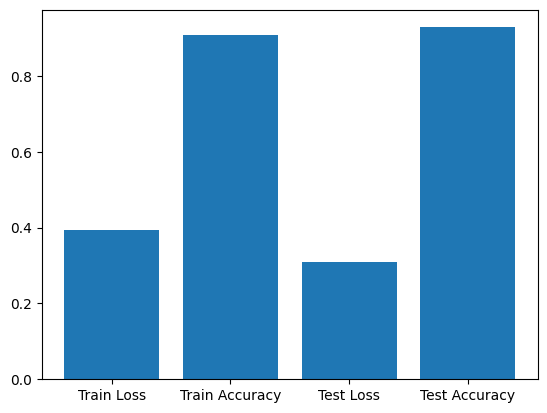

In [ ]:
import matplotlib.pyplot as plt

# Your training and testing loss and accuracy
train_loss = 0.39357712864875793
train_accuracy = 0.9073705077171326
test_loss = 0.30817797780036926
test_accuracy = 0.9282868504524231

# Create a bar chart
labels = ['Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy']
values = [train_loss, train_accuracy, test_loss, test_accuracy]

# Create bars
plt.bar(labels, values)

# Create names on the x-axis
plt.xticks(range(len(labels)), labels)

# Show graphic
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get some random indices from the test set
num_samples_to_display = 5  # Number of random samples to display
random_indices = np.random.choice(X_test.shape[0], num_samples_to_display, replace=False)

# Get the corresponding images, ground truth labels, and predicted labels
images_to_display = X_test[random_indices]
true_labels = y_test[random_indices]
predicted_labels = model.predict(images_to_display)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Convert true_labels to integers because they are one-hot encoded
true_labels_int = np.argmax(true_labels, axis=1)

# Display the images along with their ground truth and predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(images_to_display[i].reshape(height, width, channels))
    plt.title(f"True: {true_labels_int[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
import numpy as np

# Assume 'predictions' is the output from the model.predict() function
predictions = model.predict(X_test)

# Apply argmax to get the class labels
labels = np.argmax(predictions,axis=1)

print(labels)


8/8 [==============================] - 0s 8ms/step
[1 0 0 2 1 2 1 0 0 1 0 0 1 1 0 2 1 1 2 0 0 1 1 0 1 0 2 1 1 0 1 1 2 1 0 1 2
 0 0 1 0 0 0 1 1 1 1 1 1 0 2 0 1 1 1 1 1 2 2 0 1 1 2 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 2 2 1 1 2 1 2 0 2 0 1 2 0 0 0 0 0 0 1 1 1 1 1 2 1 2 0 2
 2 0 2 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 2 0 1 2 0 1 0 0 1 1 2 1 1 0 1 0
 2 1 0 0 0 0 0 2 2 1 0 2 0 1 2 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 2 0
 1 0 0 2 0 1 0 0 0 1 1 1 1 0 1 2 1 2 1 0 1 0 1 1 2 1 0 1 0 1 0 1 0 1 1 1 1
 0 0 1 1 1 0 0 1 1 1 1 1 2 0 2 1 2 1 1 1 1 2 0 0 2 1 1 1 1]


In [ ]:
predicted_classes=np.argmax(predictions)
print(predicted_classes)

7


In [22]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your one-hot encoded labels and predictions
conf = confusion_matrix(class_names, labels)
print(conf)

[[51 34  1]
 [25 80  7]
 [ 8 13 32]]


Text(0.5, 155.72222222222217, 'Predicted')

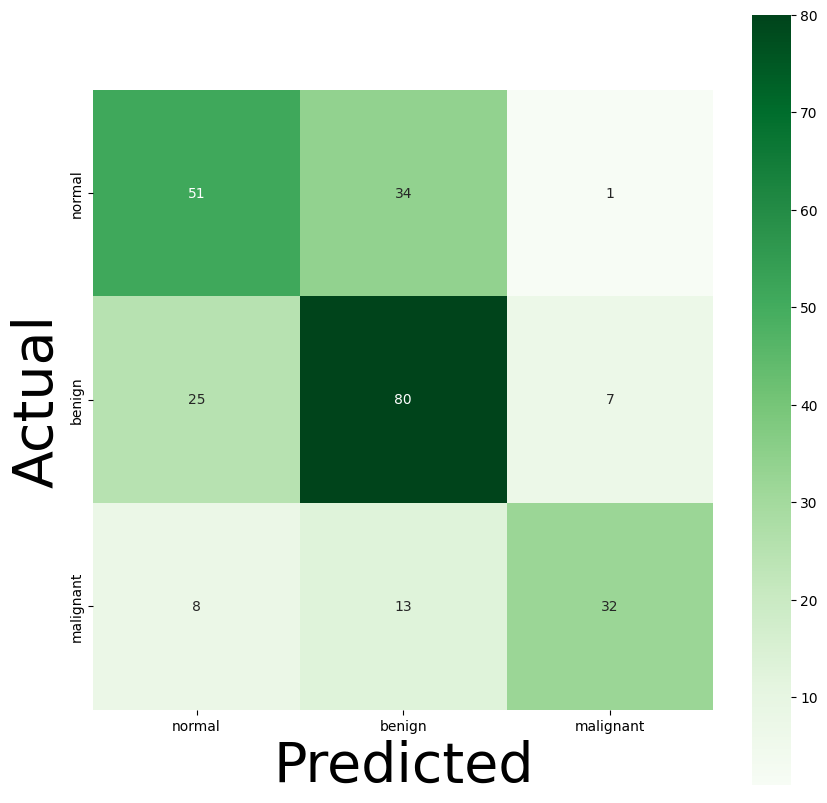

In [23]:

info = [
    'normal'   ,  # 0
    'benign'   ,  # 1
    'malignant',  # 2
]
plt.figure(figsize = (10,10))
ax = sns.heatmap(conf, cmap=plt.cm.Greens, annot=True, square=True, xticklabels = info, yticklabels = info)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
predictions = model.predictions(X_test,y_test)

In [ ]:
from sklearn.metrics import f1_score

# Assume 'predictions' is the output from the model.predict() function
#predictions = model.predict(X_test)

# Apply argmax to get the class labels
#labels = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate F1 score
f1 = f1_score(y_true, labels, average='macro')
print(f1)


0.9309240295308406
